#                                 Weather Analysis of DELHI :(ongoing project, not completed)




In this project , we are going to analyse the weather data of the Delhi City and and will see how the weather has changed over the past 20 years and how it has effected the other phenomenon.
We have the dataset which can be downloaded from [here](https://www.kaggle.com/mahirkukreja/delhi-weather-data).
We have downloaded the dataset into our local and without any further adieu , let us start the analysis.

In [1]:
#Load the important modules
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal,seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error


#### Load the data:

In [2]:
df=pd.read_csv(r'C:\Users\Thor\Documents\Projects\Delhi Weather dataset\testset.csv',index_col='datetime_utc',parse_dates=['datetime_utc'])
df.head(5)

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
#since the column names are unclear, lets change the column names
df.columns=['condition','dew','fog','hail','heatindex','humidity','precipt','pressure','rain','snow','temp','thunder','tornado','vism','wind_dird','wind_dir','wgustm','windchillm','wsdm']
df.tail()

,condition,dew,fog,hail,heatindex,humidity,precipt,pressure,rain,snow,temp,thunder,tornado,vism,wind_dird,wind_dir,wgustm,windchillm,wsdm
datetime_utc,,,,,,,,,,,,,,,,,,,
2017-04-24 06:00:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
2017-04-24 09:00:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
2017-04-24 12:00:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
2017-04-24 15:00:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
2017-04-24 18:00:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [4]:
#lets have a look at some basic attributes of the dataset we have
#shape of the dataframe
print('The shape of the DataFrame is ', df.shape)
print('-'*100)
#info of the dataframe
print(df.info())
print('-'*100)
#columns of the dataframe
print('The columns of df are\n',df.columns.tolist())
print('-'*100)
#finding any missing values
print('No of Missing Values per column\n', df.isnull().sum())

print('-'*100)
#looking for unique values per column
print('Unique values per columns\n',df.nunique())

The shape of the DataFrame is  (100990, 19)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100990 entries, 1996-11-01 11:00:00 to 2017-04-24 18:00:00
Data columns (total 19 columns):
condition     100918 non-null object
dew           100369 non-null float64
fog           100990 non-null int64
hail          100990 non-null int64
heatindex     29155 non-null float64
humidity      100233 non-null float64
precipt       0 non-null float64
pressure      100758 non-null float64
rain          100990 non-null int64
snow          100990 non-null int64
temp          100317 non-null float64
thunder       100990 non-null int64
tornado       100990 non-null int64
vism          96562 non-null float64
wind_dird     86235 non-null float64
wind_dir      86235 non-null object
wgustm        1072 non-null float64
windchillm    579 non-null float64
wsdm          98632 non-null float64
dtypes: float64(1

### Taking Care of Missing value :

In [5]:
#We can see 4 columns namely heatindex,precipt, wgustm,windchillm  has more than 50% missing values, so lets drop them.


df1=df.drop(columns=['heatindex','precipt','wgustm','windchillm'])
df1.head()


,condition,dew,fog,hail,humidity,pressure,rain,snow,temp,thunder,tornado,vism,wind_dird,wind_dir,wsdm
datetime_utc,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


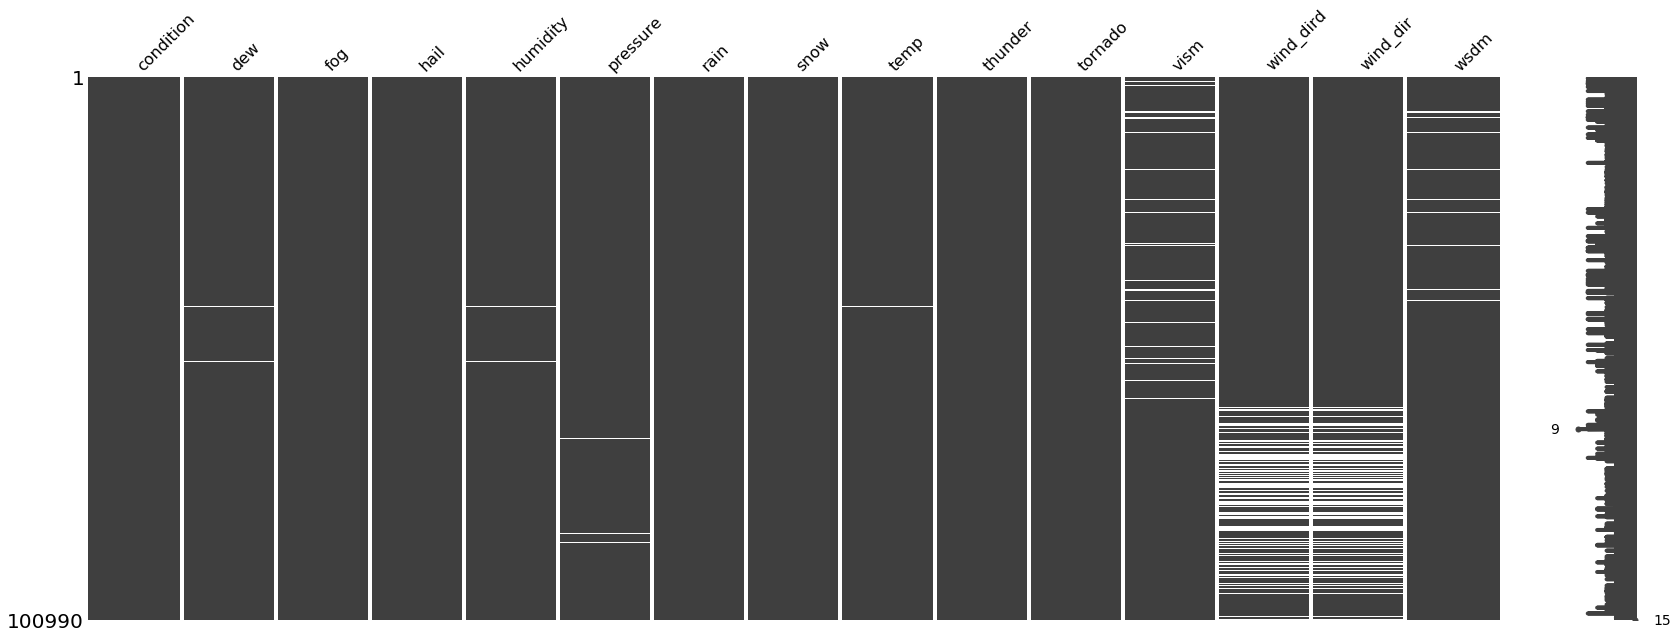

In [6]:
#lets us now take care of the other missing values
#lets visualize the missing data distribution

import missingno as msn
msn.matrix(df1)

In [7]:
#we can see the missing values from the missingno visualization. Lets fill them using forward fill method

df1=df1.iloc[1:]
df1=df1.fillna(method='ffill')
df1.head()

,condition,dew,fog,hail,humidity,pressure,rain,snow,temp,thunder,tornado,vism,wind_dird,wind_dir,wsdm
datetime_utc,,,,,,,,,,,,,,,
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
1996-11-01 17:00:00,Smoke,12.0,0,0,56.0,1011.0,0,0,21.0,0,0,1.2,0.0,North,0.0


In [8]:
#We can see almost all missing values are gone, except the one in the 1st row, because we used ffill method and by default the 1st row used its own value.
#To tackle this, we will use the fillna method again , but this time with bfill method

df1=df1.iloc[1:]
df1=df1.fillna(method='bfill')
df1.head()

,condition,dew,fog,hail,humidity,pressure,rain,snow,temp,thunder,tornado,vism,wind_dird,wind_dir,wsdm
datetime_utc,,,,,,,,,,,,,,,
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,2.0,0.0,North,0.0
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,0.0
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
1996-11-01 17:00:00,Smoke,12.0,0,0,56.0,1011.0,0,0,21.0,0,0,1.2,0.0,North,0.0
1996-11-01 18:00:00,Smoke,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0


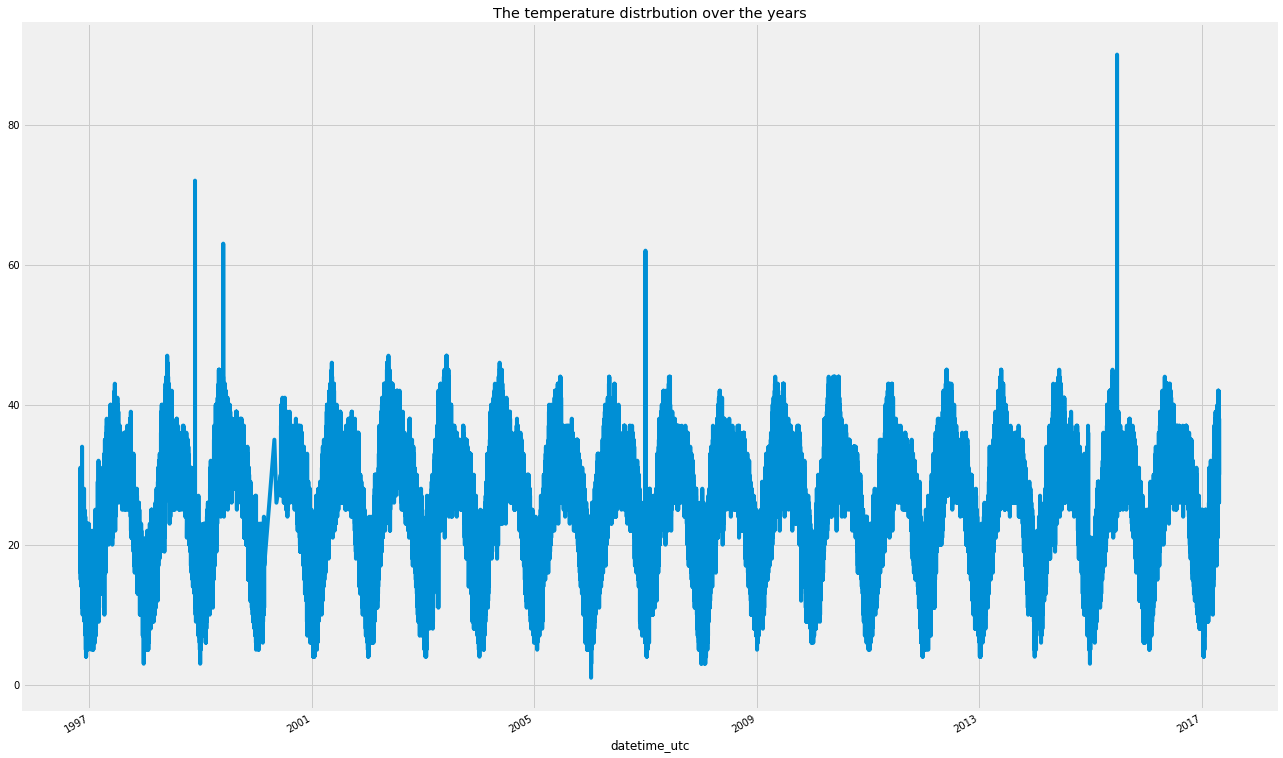

In [9]:
#now all missing values are gone, we can proceed further with our data analysis
fig=plt.subplots(figsize=(20,14))
df1['temp'].plot()

plt.title('The temperature distrbution over the years')
plt.show()

#### Temperature distribution for delhi over the years grouped by variety of time window

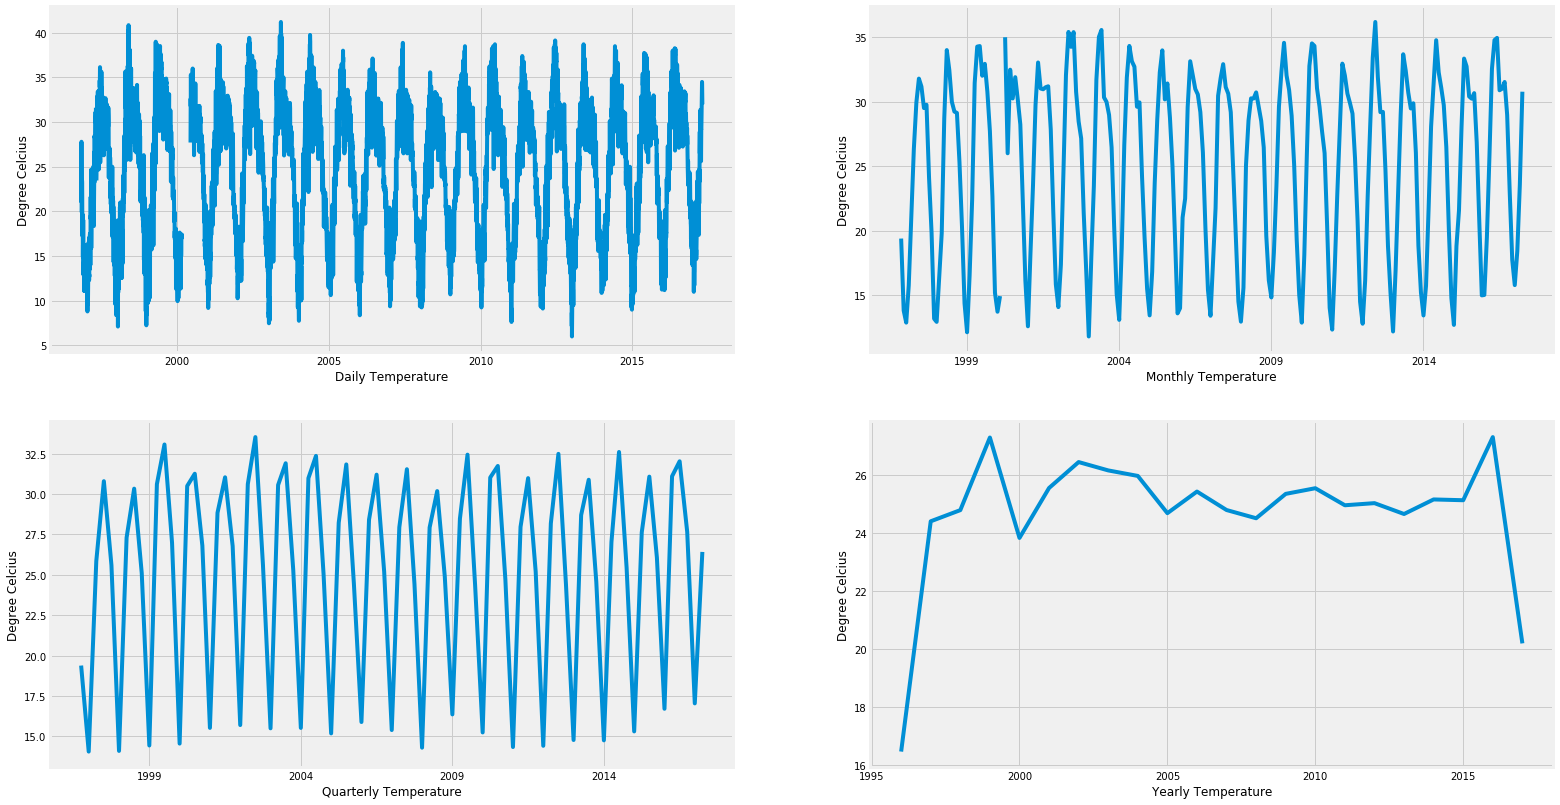

In [10]:
f,ax=plt.subplots(2,2,figsize=(24,14))

df1['temp'].resample('D').mean().plot(ax=ax[0,0])
ax[0,0].set(xlabel='Daily Temperature', ylabel='Degree Celcius')
df1['temp'].resample('M').mean().plot(ax=ax[0,1])
ax[0,1].set(xlabel='Monthly Temperature', ylabel='Degree Celcius')
df1['temp'].resample('3M').mean().plot(ax=ax[1,0])
ax[1,0].set(xlabel='Quarterly Temperature', ylabel='Degree Celcius')
df1['temp'].resample('Y').mean().plot(ax=ax[1,1])
ax[1,1].set(xlabel='Yearly Temperature', ylabel='Degree Celcius')

plt.show()

### Next up, lets analyse how the weather condition has been for delhi over the years

In [11]:

condition=df1['condition'].value_counts()


condition.head()


Haze               47639
Smoke              20763
Mist                9389
Clear               3129
Widespread Dust     2862
Name: condition, dtype: int64

In [12]:
import seaborn as sns

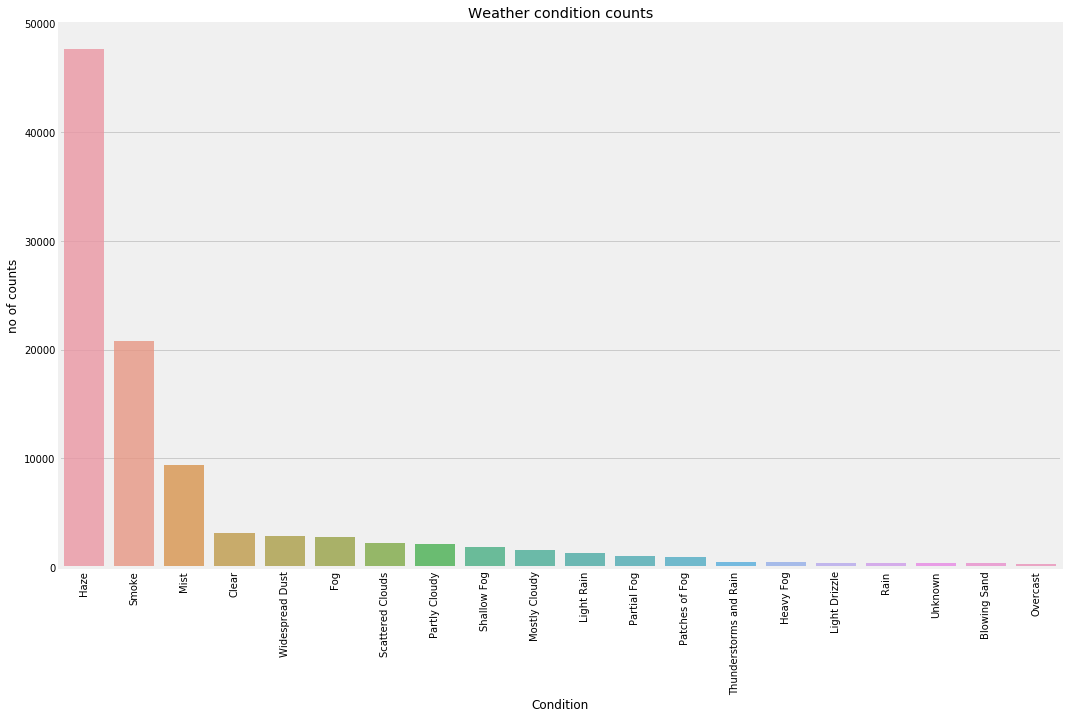

In [13]:
condition=condition[:20]
plt.subplots(figsize=(16,10))
sns.barplot(condition.index,condition.values,alpha=0.8)
plt.title('Weather condition counts')
plt.xlabel('Condition')
plt.xticks(rotation=90)
plt.ylabel('no of counts')
plt.show()

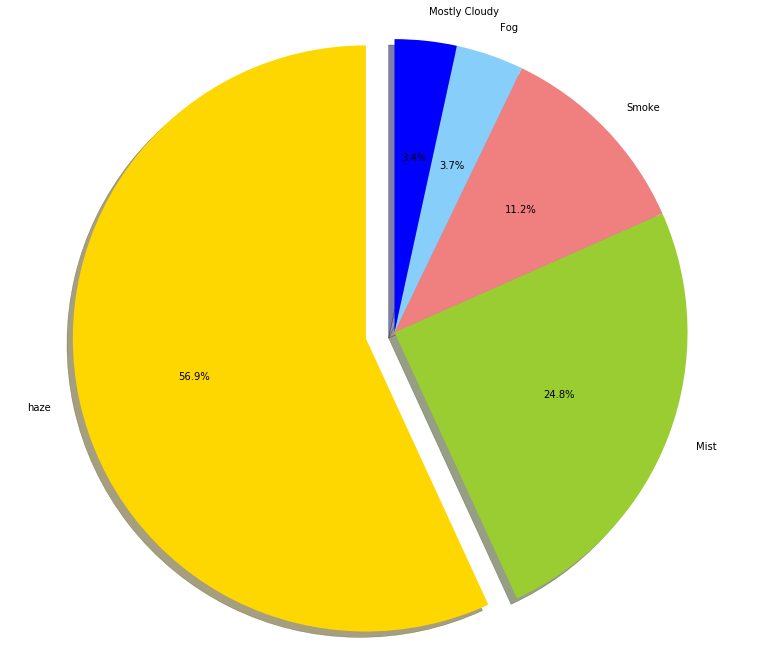

In [14]:
#top 5 weather condition in Delhi over the years

df1['condition'].value_counts()[:5]
# Data to plot
plt.subplots(figsize=(12,12))
labels = 'haze', 'Mist', 'Smoke', 'Fog','Mostly Cloudy'
sizes = df1['condition'].value_counts()[:5]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()


### Looks pretty clear that over the past 20 years, delhi has been hazy for more than half of the year everyyear. Any guesses why is that? We can guess pretty much, for pollution may be? but only intuitive guess we can make, as we donot have any pollution data for delhi.

### Okay lets dig into humidity now:

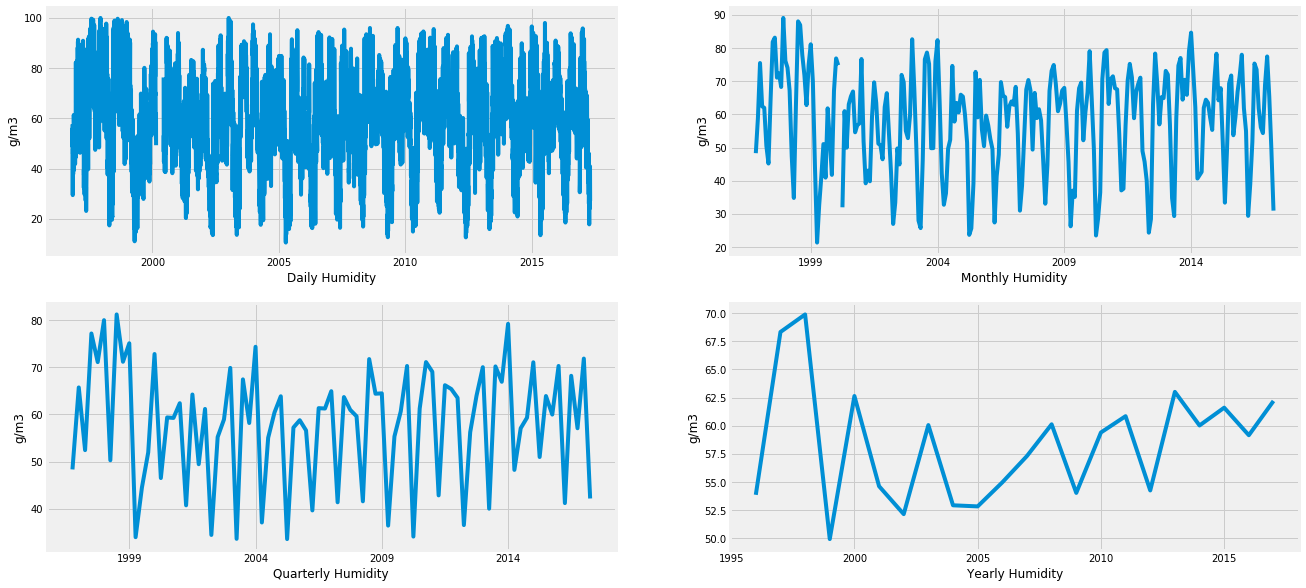

In [15]:

#displaying the humidity distribution over the years


f,ax=plt.subplots(2,2,figsize=(20,10))

df1['humidity'].resample('D').mean().plot(ax=ax[0,0])
ax[0,0].set(xlabel='Daily Humidity', ylabel='g/m3')
df1['humidity'].resample('M').mean().plot(ax=ax[0,1])
ax[0,1].set(xlabel='Monthly Humidity', ylabel='g/m3')
df1['humidity'].resample('3M').mean().plot(ax=ax[1,0])
ax[1,0].set(xlabel='Quarterly Humidity', ylabel='g/m3')
df1['humidity'].resample('Y').mean().plot(ax=ax[1,1])
ax[1,1].set(xlabel='Yearly Humidity', ylabel='g/m3')
plt.show()

### Lets look at the last 5 years Humidity,pressure and temperature

In [16]:
#Load the last 5 years the data
df2=df1.loc['2012':,['humidity','pressure','temp']]
df2.head()

,humidity,pressure,temp
datetime_utc,,,
2012-01-01 00:00:00,79.0,1015.0,14.0
2012-01-01 03:00:00,83.0,1016.0,14.0
2012-01-01 06:00:00,71.0,1016.0,18.0
2012-01-01 09:00:00,68.0,1014.0,18.0
2012-01-01 12:00:00,83.0,1014.0,17.0


In [17]:
#checking the data distribution
df2.describe()

,humidity,pressure,temp
count,18829.000000,18829.000000,18829.000000
mean,59.769027,1009.842849,25.468001
std,23.866194,775.995629,8.380865
min,4.000000,-9999.000000,3.000000
25%,41.000000,1002.000000,19.000000
50%,60.000000,1009.000000,27.000000
75%,80.000000,1015.000000,32.000000
max,243.000000,101014.000000,90.000000


### We can see there are outliers in the data we have selected . By just looking at the data above we can catch the outliers(e.g. check the minm and maxm values for each columns).
### A temperature of 90 degree celcius?? holy lord!!!!!
### Lets remove them in the following section

In [18]:
#Outlier removal

from scipy import stats
df3=df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]
df3.describe()

#For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
#Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
#all(axis=1) ensures that for each row, all column satisfy the constraint.
#Finally, result of this condition is used to index the dataframe.

,humidity,pressure,temp
count,18814.000000,18814.000000,18814.000000
mean,59.756139,1008.358775,25.464760
std,23.828940,12.014282,8.366976
min,4.000000,100.000000,3.000000
25%,41.000000,1002.000000,19.000000
50%,60.000000,1009.000000,27.000000
75%,80.000000,1015.000000,32.000000
max,100.000000,1100.000000,45.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002046B1C9860>,
      dtype=object)

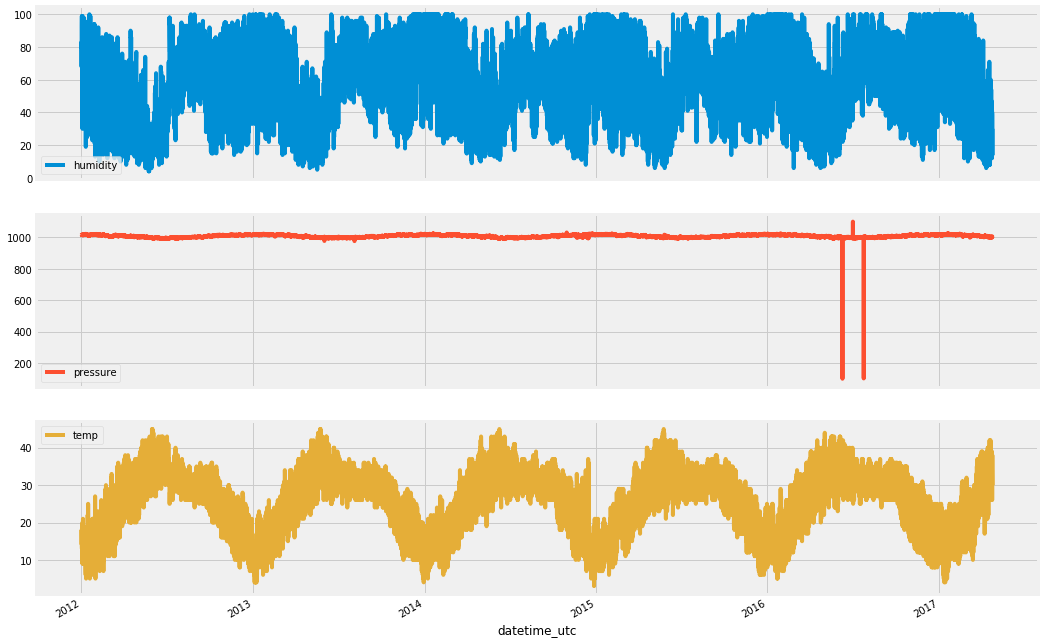

In [19]:
df3.plot(subplots=True,figsize=(16,12))

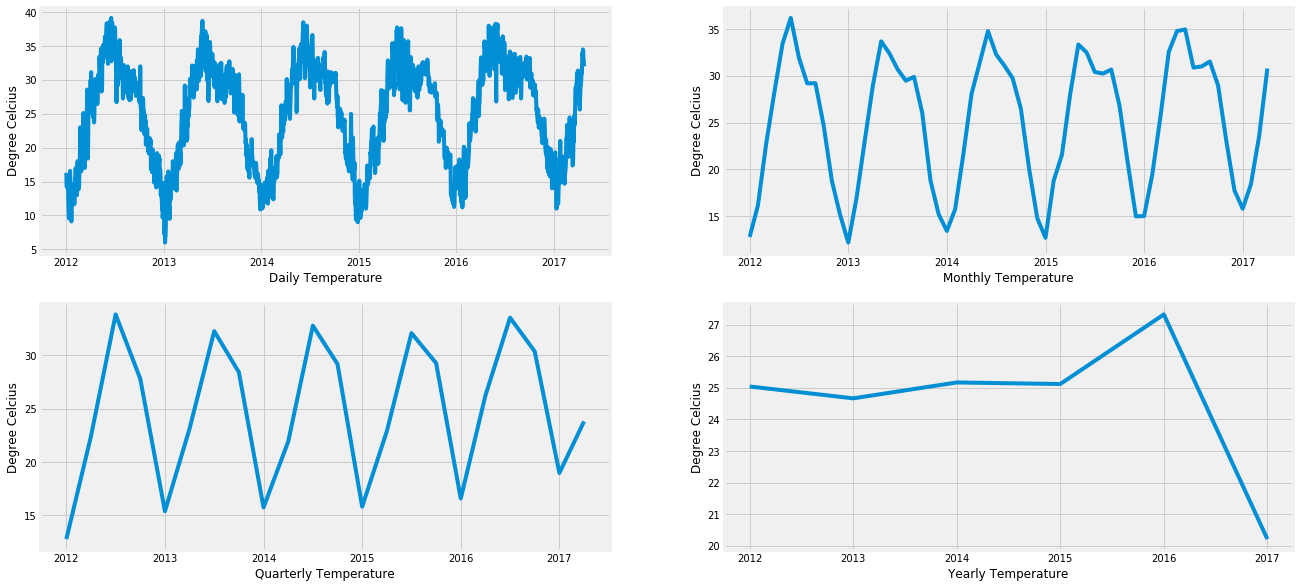

In [20]:
#lets analyse the temp for last 5 years

f,ax=plt.subplots(2,2,figsize=(20,10))

df3['temp'].resample('D').mean().plot(ax=ax[0,0])
ax[0,0].set(xlabel='Daily Temperature', ylabel='Degree Celcius')
df3['temp'].resample('M').mean().plot(ax=ax[0,1])
ax[0,1].set(xlabel='Monthly Temperature', ylabel='Degree Celcius')
df3['temp'].resample('3M').mean().plot(ax=ax[1,0])
ax[1,0].set(xlabel='Quarterly Temperature', ylabel='Degree Celcius')
df3['temp'].resample('Y').mean().plot(ax=ax[1,1])
ax[1,1].set(xlabel='Yearly Temperature', ylabel='Degree Celcius')

plt.show()

count    64.000000
mean     25.157886
std       7.069420
min      12.174863
25%      18.794601
50%      27.418101
75%      30.914979
max      36.183962
Name: temp, dtype: float64


Text(0.5,1,'Temperature-Humidity relationship for 2012-17')

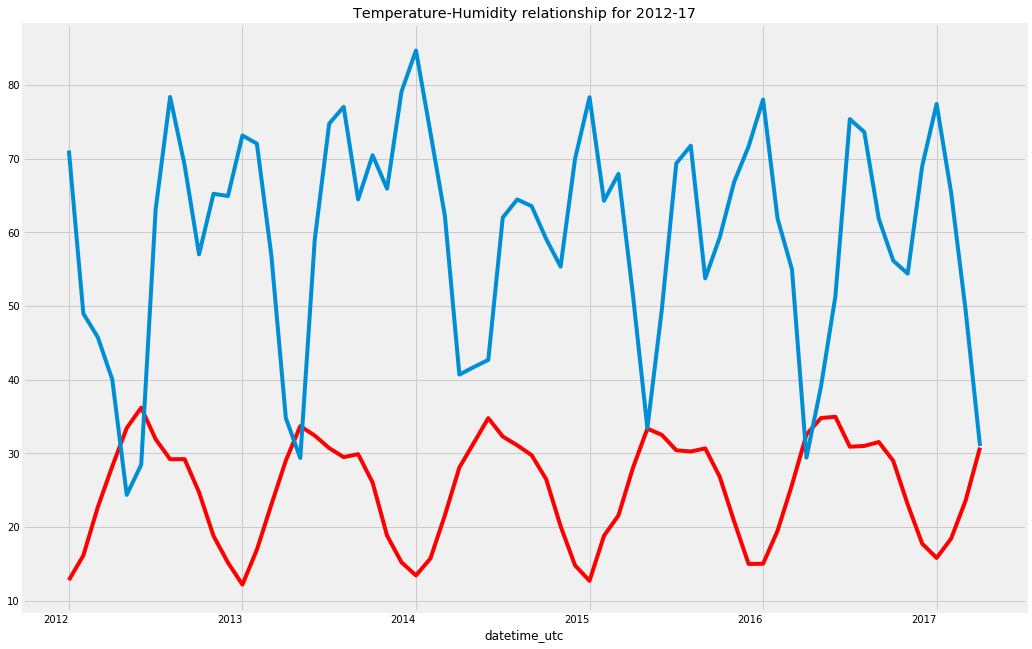

In [21]:
#Monthly temperature-humidity relationship data for the last 5 years

print(df3.resample('M').mean()['temp'].describe())
df3.resample('M').mean()['temp'].plot(subplots=True,figsize=(16,12),color='red')
df3.resample('M').mean()['humidity'].plot(subplots=True,figsize=(16,12))
plt.title('Temperature-Humidity relationship for 2012-17')

# Lets now Deeply analyse the last year data :2016-17



(-1.2136092759302444,
 1.1236869616906362,
 -1.1362387369312867,
 1.1017256622787623)

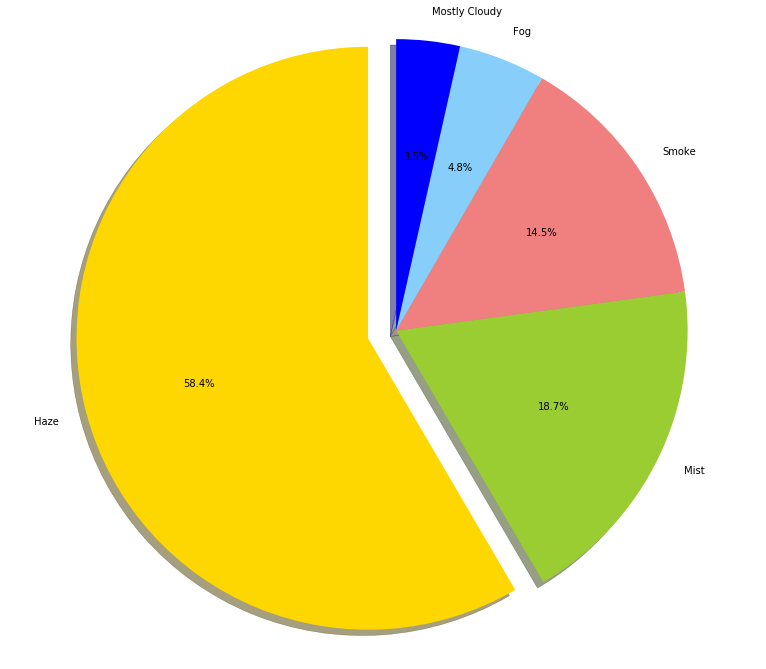

In [22]:
df4=df1.loc['2016':,['condition','humidity','pressure','temp']]

# Data to plot
plt.subplots(figsize=(12,12))
labels =df4['condition'].value_counts().index[:5]
sizes = df4['condition'].value_counts()[:5]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')



## In the follwing lines we will analyse the variation of pressure, temperature ,humidity of delhi based on the weather condition of the day.
## Lets Roll...

In [23]:
df4['condition'].value_counts()[:5].index

Index(['Haze', 'Mist', 'Smoke', 'Fog', 'Mostly Cloudy'], dtype='object')

In [24]:
list=['Haze', 'Mist', 'Smoke', 'Fog', 'Mostly Cloudy']

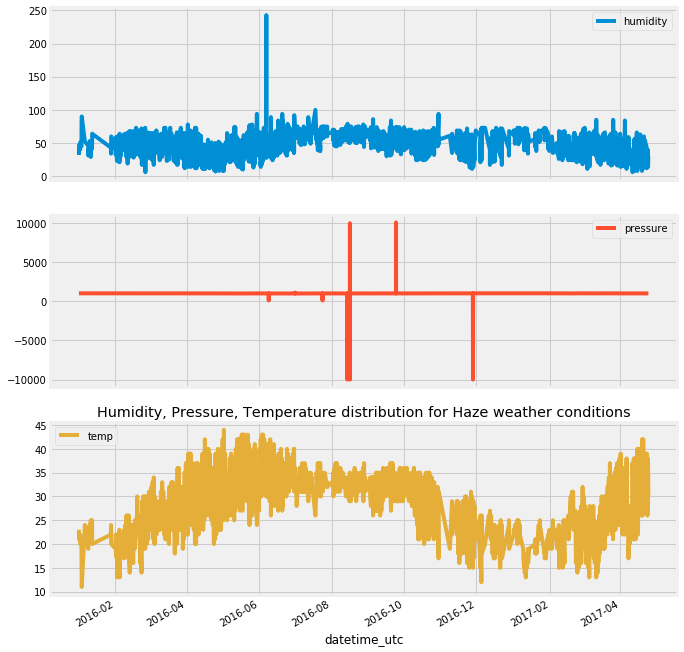

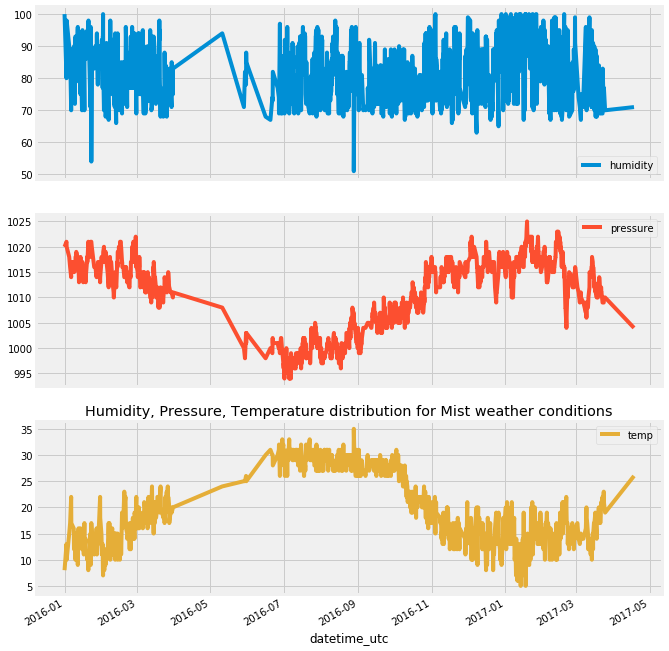

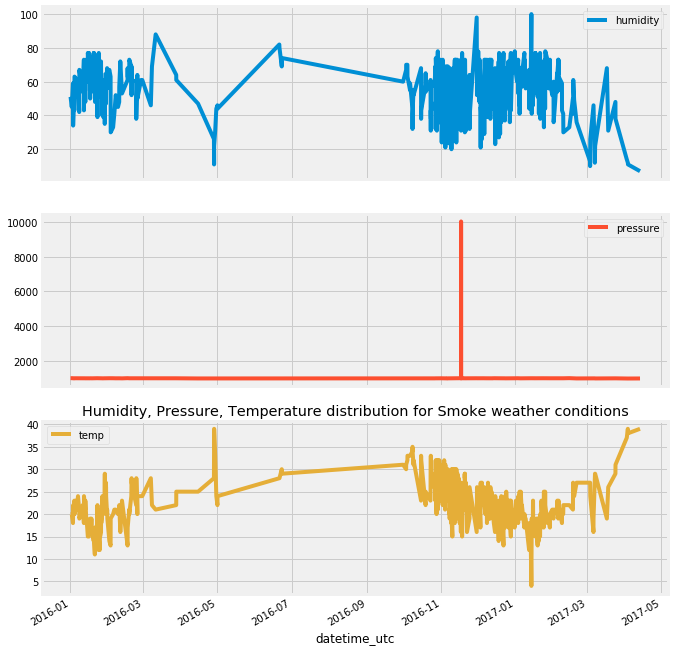

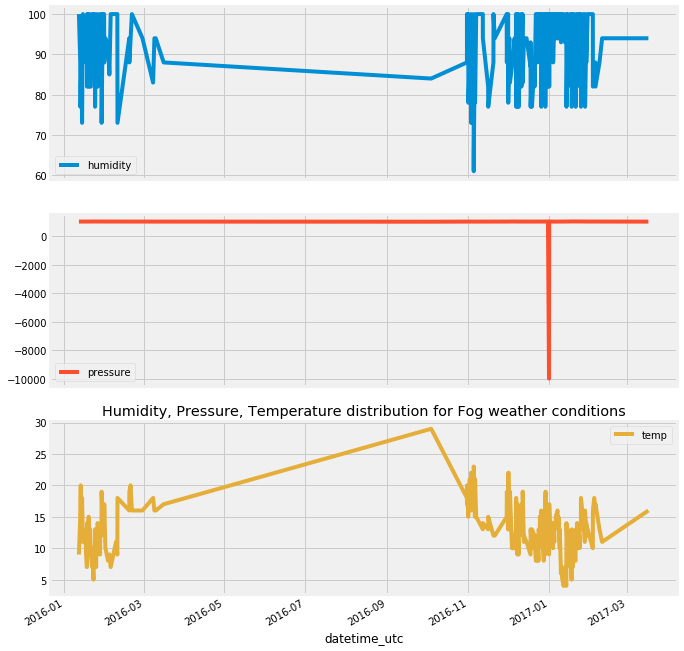

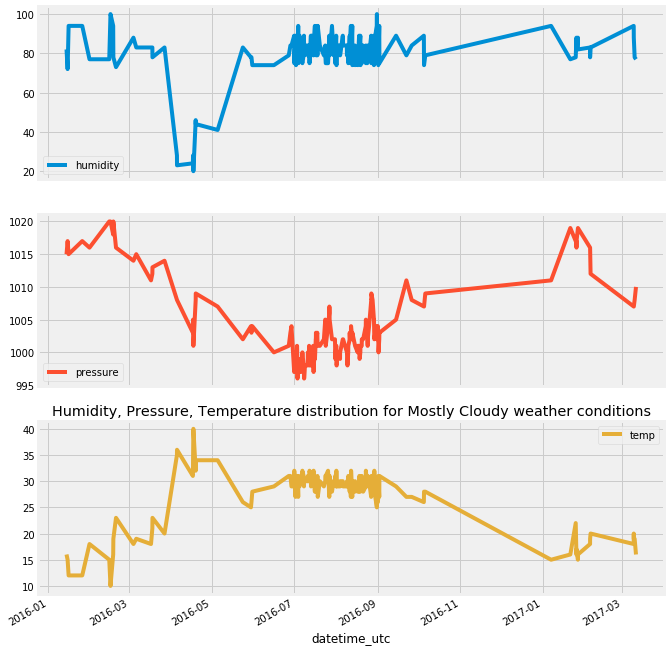

In [25]:
for i in list:
    df5=df4[df4['condition']==i]
    df5.plot(subplots=True,figsize=(10,12))
    plt.title('Humidity, Pressure, Temperature distribution for {} weather conditions'.format(i))
    print('')
    plt.show()
    

## Temperature and Humidity relationship for 2016-17

count    480.000000
mean      25.823481
std        7.145678
min       11.000000
25%       19.125000
50%       27.285880
75%       31.750000
max       38.272727
Name: temp, dtype: float64


Text(0.5,1,'Temperature-Humidity relationship for 2016')

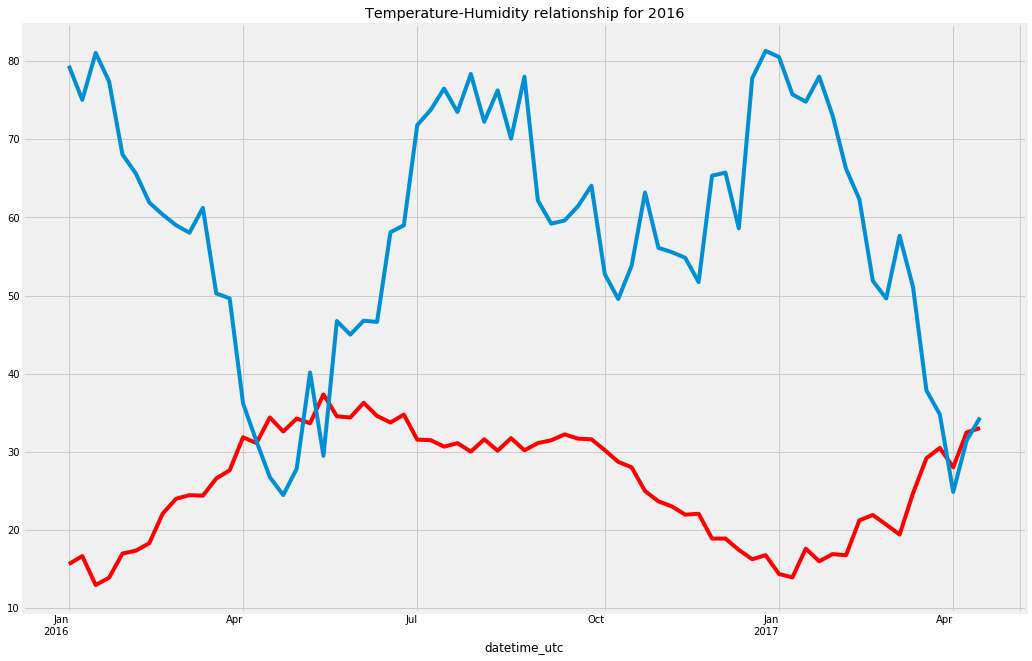

In [26]:
#weekly temperature data for the year 2016

print(df4.resample('D').mean()['temp'].describe())
df4.resample('7D').mean()['temp'].plot(subplots=True,figsize=(16,12),color='red')
df4.resample('7D').mean()['humidity'].plot(subplots=True,figsize=(16,12))
plt.title('Temperature-Humidity relationship for 2016')


## Clear indication that temperature and humidity are inversly proportional.
## Delhi weather heats up from april and the summer continues till october mid.
## in 2016-17 year maxm temperature was 38.27 degrees in May-June and it went down to a minimum of 11 degrees in Jan-Feb.

In [27]:
df_temp=df1.loc[:,['temp']]
df_temp.head()
df_temp.shape
df_temp=df_temp[(np.abs(stats.zscore(df_temp)) < 3).all(axis=1)]
df_temp.describe()


,temp
count,100984.000000
mean,25.436317
std,8.482930
min,1.000000
25%,19.000000
50%,27.000000
75%,32.000000
max,47.000000


In [28]:
A=df_temp.resample('M').max()
A.index

DatetimeIndex(['1996-11-30', '1996-12-31', '1997-01-31', '1997-02-28',
               '1997-03-31', '1997-04-30', '1997-05-31', '1997-06-30',
               '1997-07-31', '1997-08-31',
               ...
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30'],
              dtype='datetime64[ns]', name='datetime_utc', length=246, freq='M')

# Delhi '97 vs Delhi '16

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020476857358>],
      dtype=object)

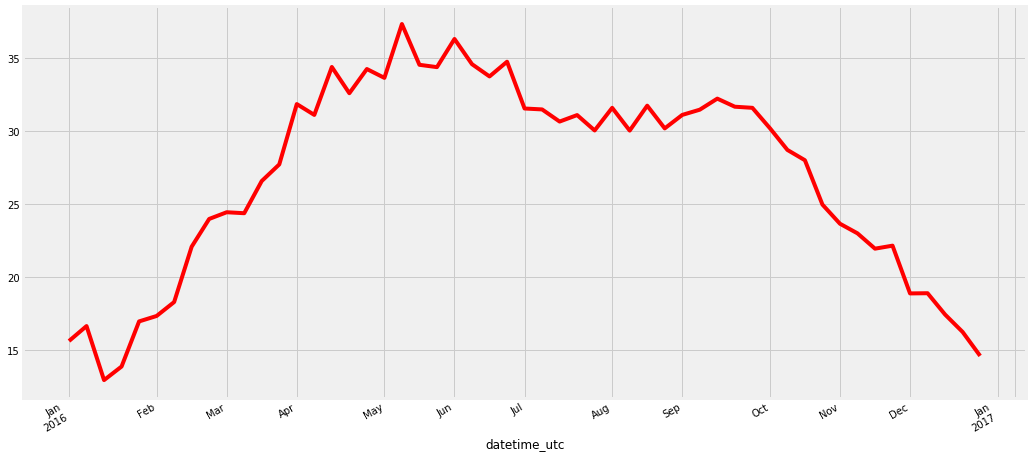

In [43]:
#slicing 2016 data
df8=df1.loc['2016',['humidity','pressure','temp']]
#removing outliers
df8=df8[(np.abs(stats.zscore(df8)) < 3).all(axis=1)]
df8.head()



#slicing 1997 data
df9=df1.loc['1997',['humidity','pressure','temp']]
df9=df9[(np.abs(stats.zscore(df9)) < 3).all(axis=1)]

df8.resample('7D').mean()['temp'].plot(subplots=True,figsize=(16,8),color='red')





array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002046694B400>],
      dtype=object)

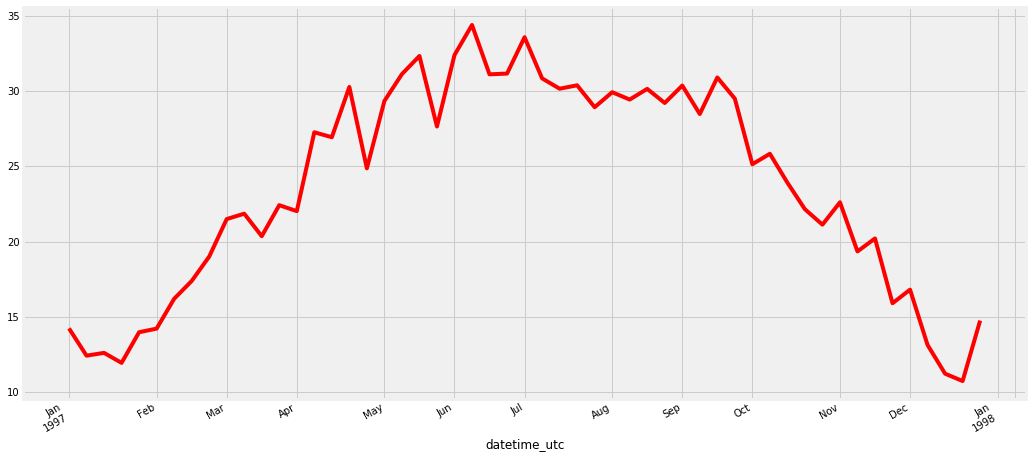

In [42]:
df9.resample('7D').mean()['temp'].plot(subplots=True,figsize=(16,8),color='red')

### insights:
-  We can clearly see from the above two graphs that there has been an increase in temperature (on avg 4 deree celcius) over the past 20 ears only.
-  while in 1997 the maxm temperature hit to a mark of 34 degree celcius in jun-july month, the delhi temperature rose to a maximum of 38 degrees in 2016 May june season

# Modeling

-  ## Trends, seasonality and noise
      These are the components of a time series

-      Trend - Consistent upwards or downwards slope of a time series
-      Seasonality - Clear periodic pattern of a time series(like sine funtion)
-      Noise - Outliers or missing values

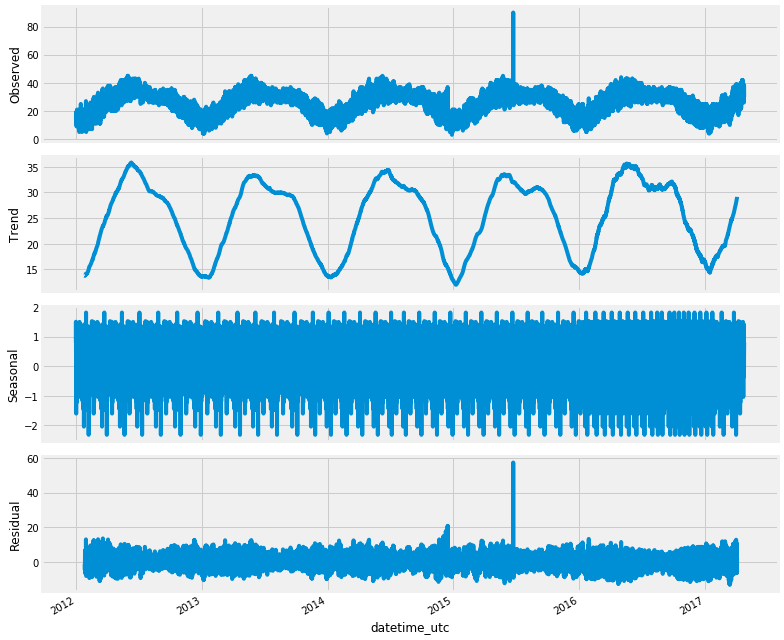

In [48]:
rcParams['figure.figsize'] = 11, 9
decomposed_delhi_temp = sm.tsa.seasonal_decompose(df2["temp"],freq=360) # The frequncy is annual
figure = decomposed_delhi_temp.plot()
plt.show()

### There are various models to train and predict time series such as AR, MA ,ARMA ARIMA .
### In this project we will use ARIMA model(which stands for autoregressive integrated moving average).

## ARIMA:

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                18827
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -52505.765
Method:                       css-mle   S.D. of innovations              3.935
Date:                Sun, 21 Apr 2019   AIC                         105019.530
Time:                        12:02:21   BIC                         105050.902
Sample:                             1   HQIC                        105029.824
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.020     -0.009      0.993      -0.038       0.038
ar.L1.D.y     -0.3171      0.007    -44.019      0.000      -0.331      -0.303
ar.L2.D.y     -0.1524      0.007    -21.163      0.0

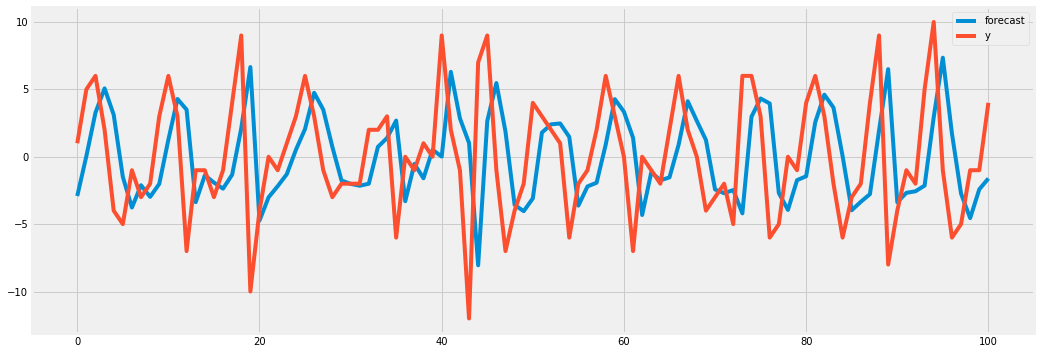

TypeError: Expected sequence or array-like, got <class 'statsmodels.tsa.arima_model.ARIMAResultsWrapper'>

In [53]:
# Predicting the temperature of delhi in next years
rcParams['figure.figsize'] = 16, 6
model = ARIMA(df2["temp"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=900, end=1000)
plt.show()

error = mean_squared_error(result, model.predict(df2['temp'].diff().iloc[1:].values))
print(error)

### Without doing any optimization technique, this is the predicted model we have got till now.
### This is my *ongoing project* which is still in the initial phase and i am constantly working on it